In [2]:
#Commenting for better understanding of code 
#importing the necessary libraries
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
import matplotlib.cm as cm

In [3]:
#locating the file and adding the dataset in the same file to be able to read it

In [4]:
pwd

'C:\\Users\\syuvr\\Documents\\ML PROJECT YOUTUBE ADVIEW PREDICTOR'

In [5]:
#Reading the file using pandas and assigning it to a object called data_train
data_train = pd.read_csv("train.csv")

In [6]:
#Reading the first 5 coloumns of the dataset
data_train.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,VID_18655,40,1031602,8523,363,1095,2016-09-14,PT7M37S,F
1,VID_14135,2,1707,56,2,6,2016-10-01,PT9M30S,D
2,VID_2187,1,2023,25,0,2,2016-07-02,PT2M16S,C
3,VID_23096,6,620860,777,161,153,2016-07-27,PT4M22S,H
4,VID_10175,1,666,1,0,0,2016-06-29,PT31S,D


In [7]:
data_train.shape

(14999, 9)

In [8]:
#since category is alphabet from A-H, assigning it numerical values and maping it
category = {'A':1,'B':2,'C':3,'D':4,'E':5,'F':6,'G':7,'H':8}
data_train["category"]= data_train["category"].map(category)

In [9]:
data_train.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,VID_18655,40,1031602,8523,363,1095,2016-09-14,PT7M37S,6
1,VID_14135,2,1707,56,2,6,2016-10-01,PT9M30S,4
2,VID_2187,1,2023,25,0,2,2016-07-02,PT2M16S,3
3,VID_23096,6,620860,777,161,153,2016-07-27,PT4M22S,8
4,VID_10175,1,666,1,0,0,2016-06-29,PT31S,4


In [10]:
#Removing all the coloumns with 'F' in it 
data_train = data_train[data_train.likes!='F']
data_train = data_train[data_train.dislikes!='F']
data_train = data_train[data_train.comment!='F']
data_train = data_train[data_train.views!='F']

In [11]:
data_train.shape

(14637, 9)

In [12]:
#Converting all values to numeric ones using pandas
data_train["views"] = pd.to_numeric(data_train["views"])
data_train["likes"] = pd.to_numeric(data_train["likes"])
data_train["dislikes"] = pd.to_numeric(data_train["dislikes"])
data_train["comment"] = pd.to_numeric(data_train["comment"])
data_train["adview"] = pd.to_numeric(data_train["adview"])

In [13]:
#assinging vivd into another object 
column_vidid = data_train['vidid']

In [14]:
#Converting all vivid,published & duration into numeric values using LabelEncoder from Sklear
from sklearn.preprocessing import LabelEncoder

In [15]:
data_train['duration'] = LabelEncoder().fit_transform(data_train['duration'])
data_train['published'] = LabelEncoder().fit_transform(data_train['published'])
data_train['vidid'] = LabelEncoder().fit_transform(data_train['vidid'])

In [16]:
data_train.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,5912,40,1031602,8523,363,1095,2168,2925,6
1,2741,2,1707,56,2,6,2185,3040,4
2,8138,1,2023,25,0,2,2094,1863,3
3,9005,6,620860,777,161,153,2119,2546,8
4,122,1,666,1,0,0,2091,1963,4


In [17]:
#Converting the duration into seconds to have a better prediction 
def checki(x):
 y = x[2:]
 h = ''
 m = ''
 s = ''
 mm = ''
 P = ['H','M','S']
 for i in y:
   if i not in P:
     mm+=i
   else:
     if(i=="H"):
       h = mm
       mm = ''
     elif(i == "M"):
       m = mm
       mm = ''
     else:
       s = mm
       mm = ''
 if(h==''):
    h = '00'
 if(m == ''):
    m = '00'
 if(s==''):
    s='00'
 bp = h+':'+m+':'+s
 return bp


In [18]:
train=pd.read_csv("train.csv")
mp = pd.read_csv("train.csv")["duration"]
time = mp.apply(checki)

In [19]:
def func_sec(time_string):
   h, m, s = time_string.split(':')
   return int(h) * 3600 + int(m) * 60 + int(s)

In [20]:
time1=time.apply(func_sec)

In [21]:
data_train["duration"]=time1


In [22]:
data_train.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,5912,40,1031602,8523,363,1095,2168,457,6
1,2741,2,1707,56,2,6,2185,570,4
2,8138,1,2023,25,0,2,2094,136,3
3,9005,6,620860,777,161,153,2119,262,8
4,122,1,666,1,0,0,2091,31,4


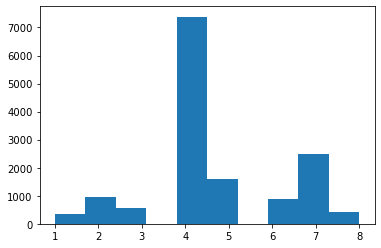

In [23]:
#Visualization using graphs 
plt.hist(data_train["category"])
plt.show()

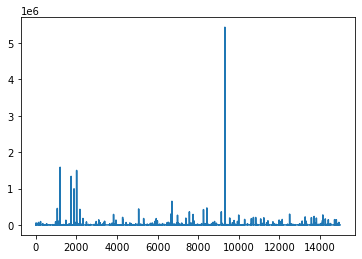

In [24]:
plt.plot(data_train["adview"])
plt.show()

In [25]:
#here, addview 5 seems like a outlier, so lets omit it
data_train = data_train[data_train["adview"] <2000000]

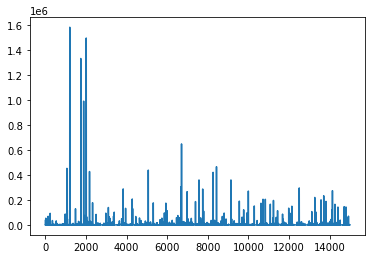

In [26]:
plt.plot(data_train["adview"])
plt.show()

In [27]:
#Splitting the dataset into training and test data set
#Before that splitting into X and Y for Y being the target(adviews) we need to predict
Y_train = pd.DataFrame(data = data_train.iloc[:,1].values ,columns = ["target"])

In [28]:
Y_train.head()

,target
0,40
1,2
2,1
3,6
4,1


In [29]:
data_train = data_train.drop(["adview"],axis=1)

In [30]:
data_train = data_train.drop(["vidid"],axis=1)

In [31]:
data_train.head()

,views,likes,dislikes,comment,published,duration,category
0,1031602,8523,363,1095,2168,457,6
1,1707,56,2,6,2185,570,4
2,2023,25,0,2,2094,136,3
3,620860,777,161,153,2119,262,8
4,666,1,0,0,2091,31,4


In [32]:
#Now data and prediction have been seprated, let's split it into test and training dataset

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
X_train, X_test, y_train, y_test = train_test_split(data_train, Y_train, test_size=0.2, random_state=2)

In [35]:
X_train.head()

,views,likes,dislikes,comment,published,duration,category
2319,441756,11174,362,998,2135,758,6
6410,1472379,34149,1500,2599,1705,402,4
7160,137,1,0,0,1778,31,4
2847,1564089,4161,741,282,2143,278,4
5609,1308,1,0,0,1240,57,4


In [36]:
X_test.head()

,views,likes,dislikes,comment,published,duration,category
9534,15192,66,4,8,1496,23,7
9766,8402,8,3,0,1240,45,4
4339,85027,243,10,33,2098,290,7
4715,173928,460,28,32,1516,33,4
10433,438890,2351,83,173,1861,201,4


In [37]:
y_test.head()

,target
9304,3
9531,3
4231,1
4599,2
10184,1


In [38]:
X_train.describe()

,views,likes,dislikes,comment,published,duration,category
count,1.170800e+04,11708.000000,11708.000000,11708.000000,11708.000000,11708.000000,11708.000000
mean,7.121741e+05,2784.642381,260.134182,415.430304,1547.060301,1044.690126,4.595149
std,2.626269e+06,8922.105978,1089.291387,1579.179280,582.560255,2307.566822,1.575226
min,4.900000e+01,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
25%,3.185775e+04,89.000000,7.000000,8.000000,1134.000000,190.000000,4.000000
50%,1.586975e+05,449.000000,38.000000,46.000000,1701.000000,328.000000,4.000000
75%,5.821485e+05,1831.250000,167.250000,221.000000,2063.000000,726.000000,6.000000
max,8.793432e+07,258611.000000,49449.000000,75045.000000,2383.000000,42317.000000,8.000000


In [39]:
#The mean of every coloumn varies greatly in scale, hence to get all to one scale, we need to normalise the data
from sklearn.preprocessing import MinMaxScaler

In [40]:
scaler = MinMaxScaler()

In [41]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [42]:
X_train.mean()

0.17385744520315036

In [43]:
#Evaluation Metrics
#Function is defined which takes the train model as input and returns the error score of 3 diffrent metrics
from sklearn import metrics
def print_error(X_test, y_test, model_name):
    prediction = model_name.predict(X_test)
    print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, prediction))
    print('Mean Squared Error:', metrics.mean_squared_error(y_test, prediction))
    print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

In [44]:
#Predicting the target using various diffrent algorithms
#Linear Regression 
from sklearn import linear_model
linear_regression = linear_model.LinearRegression()
linear_regression.fit(X_train, y_train)
print_error(X_test,y_test, linear_regression)


Mean Absolute Error: 3101.3135628243544
Mean Squared Error: 258641479.6389894
Root Mean Squared Error: 16082.334396442246


In [45]:
# Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor
decision_tree = DecisionTreeRegressor()
decision_tree.fit(X_train, y_train)
print_error(X_test,y_test, decision_tree)


Mean Absolute Error: 2052.097336065574
Mean Squared Error: 434064411.1068989
Root Mean Squared Error: 20834.212514681203


In [46]:
# Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
n_estimators = 200
max_depth = 25
min_samples_split=15
min_samples_leaf=2
random_forest = RandomForestRegressor(n_estimators = n_estimators, max_depth = max_depth, min_samples_split=min_samples_split,)
random_forest.fit(X_train,y_train)
print_error(X_test,y_test, random_forest)

<ipython-input-46-87ca2eaccc6c>:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  random_forest.fit(X_train,y_train)


Mean Absolute Error: 2496.2435104132087
Mean Squared Error: 246377108.11745477
Root Mean Squared Error: 15696.404305364167


In [50]:
#After diffrent methods, since Decision tree was with least error, we need to save the model to it
#Saving Scikit learn model
import joblib
joblib_file = "decisionTree_youtubeadview.pkl"
joblib.dump(decision_tree,joblib_file)

['decisionTree_youtubeadview.pkl']

In [74]:
#Preprocessing the test data set
data_test = pd.read_csv('test.csv')

In [75]:
loaded_model = joblib.load(joblib_file)

In [76]:
loaded_model

DecisionTreeRegressor()

In [77]:
category = {'A':1,'B':2,'C':3,'D':4,'E':5,'F':6,'G':7,'H':8}
data_test["category"]= data_test["category"].map(category)

In [78]:
data_test.head()

,vidid,views,likes,dislikes,comment,published,duration,category
0,VID_1054,440238,6153,218,1377,2017-02-18,PT7M29S,2
1,VID_18629,1040132,8171,340,1047,2016-06-28,PT6M29S,6
2,VID_13967,28534,31,11,1,2014-03-10,PT37M54S,4
3,VID_19442,1316715,2284,250,274,2010-06-05,PT9M55S,7
4,VID_770,1893173,2519,225,116,2016-09-03,PT3M8S,2


In [79]:
data_test = data_test[data_test.likes!='F']
data_test = data_test[data_test.dislikes!='F']
data_test = data_test[data_test.comment!='F']
data_test = data_test[data_test.views!='F']

In [80]:
data_test["views"] = pd.to_numeric(data_test["views"])
data_test["likes"] = pd.to_numeric(data_test["likes"])
data_test["dislikes"] = pd.to_numeric(data_test["dislikes"])
data_test["comment"] = pd.to_numeric(data_test["comment"])

In [81]:
data_test['duration'] = LabelEncoder().fit_transform(data_test['duration'])
data_test['published'] = LabelEncoder().fit_transform(data_test['published'])
data_test['vidid'] = LabelEncoder().fit_transform(data_test['vidid'])

In [82]:
train=pd.read_csv("test.csv")
mp = pd.read_csv("test.csv")["duration"]
time = mp.apply(checki)

In [83]:
data_test["duration"]=time1

In [84]:
data_test.head()

,vidid,views,likes,dislikes,comment,published,duration,category
0,231,440238,6153,218,1377,2053,457,2
1,3444,1040132,8171,340,1047,1825,570,6
2,1593,28534,31,11,1,1009,136,4
3,3775,1316715,2284,250,274,116,262,7
4,7644,1893173,2519,225,116,1892,31,2


In [85]:
data_test = data_test.drop(["vidid"],axis=1)

In [86]:
data_test.head()

,views,likes,dislikes,comment,published,duration,category
0,440238,6153,218,1377,2053,457,2
1,1040132,8171,340,1047,1825,570,6
2,28534,31,11,1,1009,136,4
3,1316715,2284,250,274,116,262,7
4,1893173,2519,225,116,1892,31,2


In [87]:
#Predicting the test data set
loaded_model.predict(data_test)

array([225., 225., 225., ..., 225., 225., 225.])

In [88]:
#Saving the test dataset predictiong onto a csv file
save = loaded_model.predict(data_test)

In [89]:
DF = pd.DataFrame(save) 

In [90]:
DF.to_csv("predictions.csv")